In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction, freqs
from scipy.fft import fft, ifft, fftfreq, fftshift

Временные сигналы (T = 0.5)


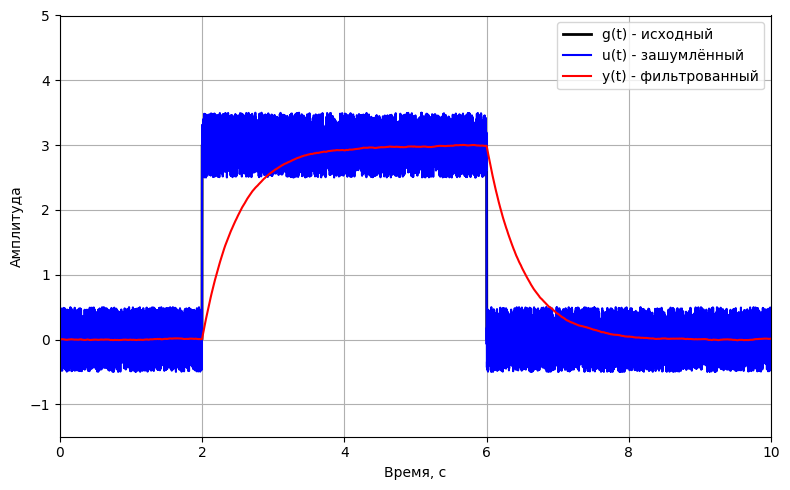

Фурье-образ сигналов


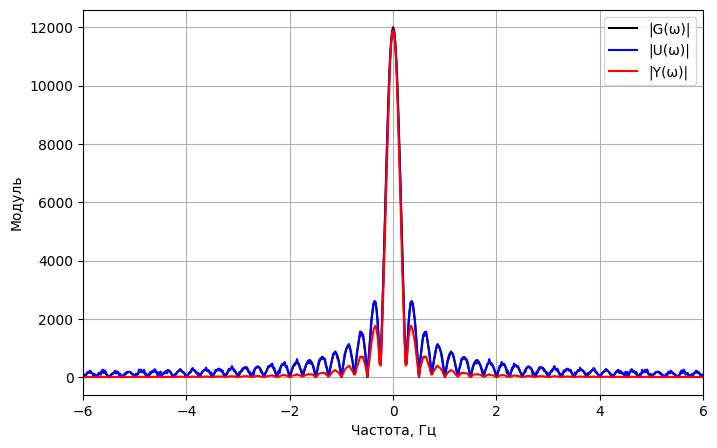

АЧХ фильтра первого порядка (T = 0.5)


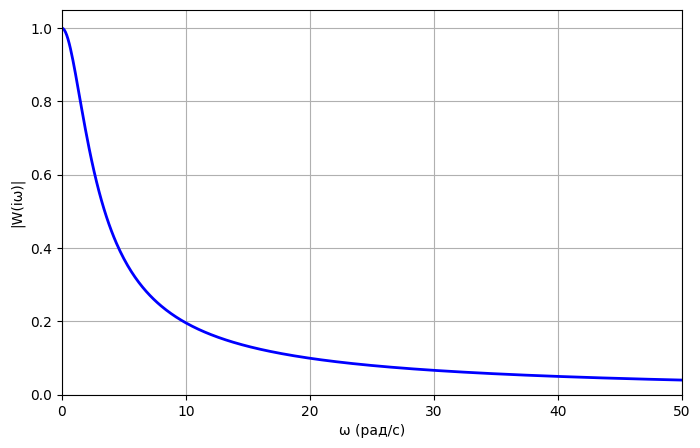

Сравнение методов фильтрации (T = 0.5)


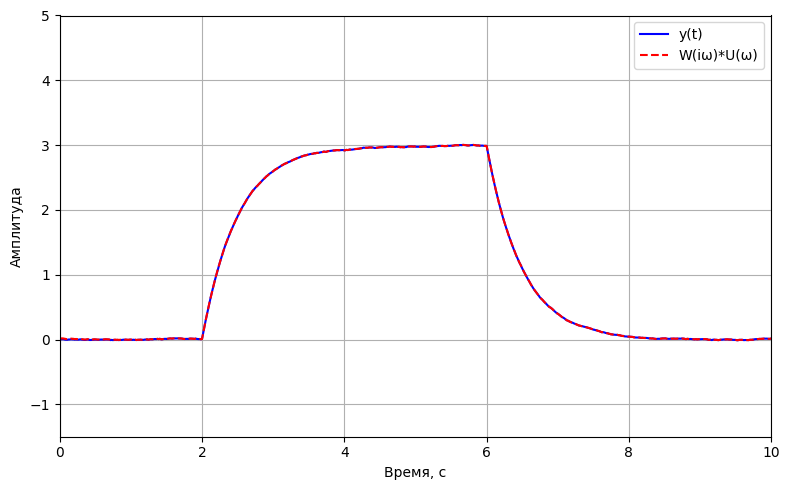

Сравнение Фурье-образов (T = 0.5)


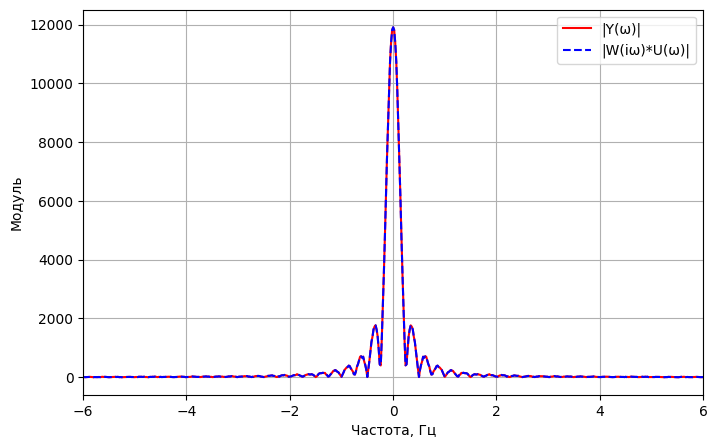

Временные сигналы (T = 0.5)


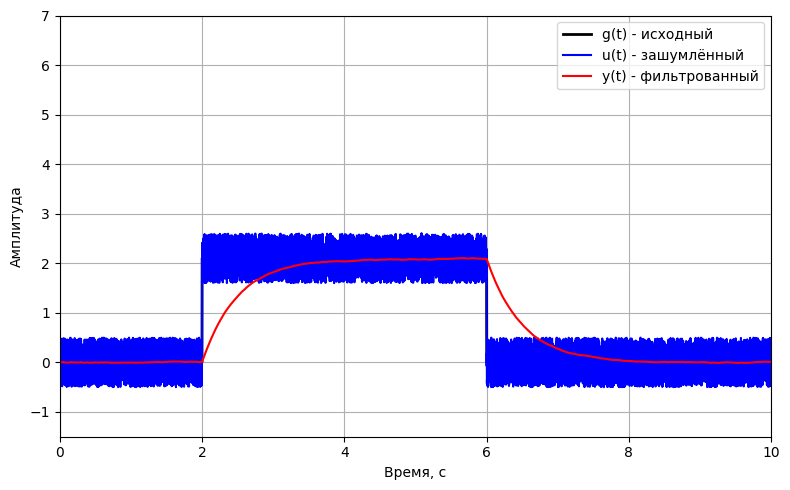

Фурье-образ сигналов


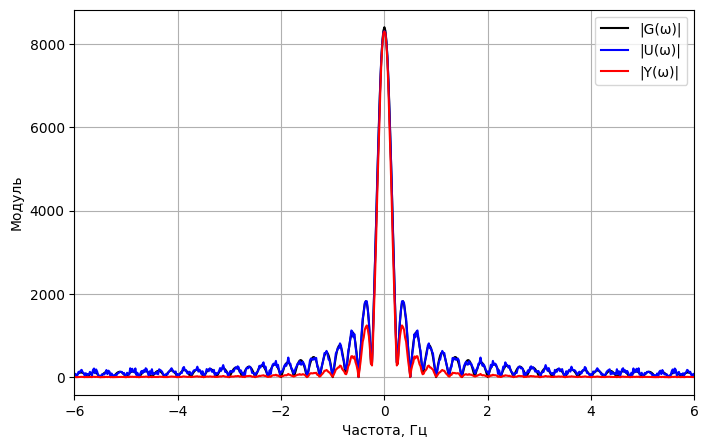

АЧХ фильтра первого порядка (T = 0.5)


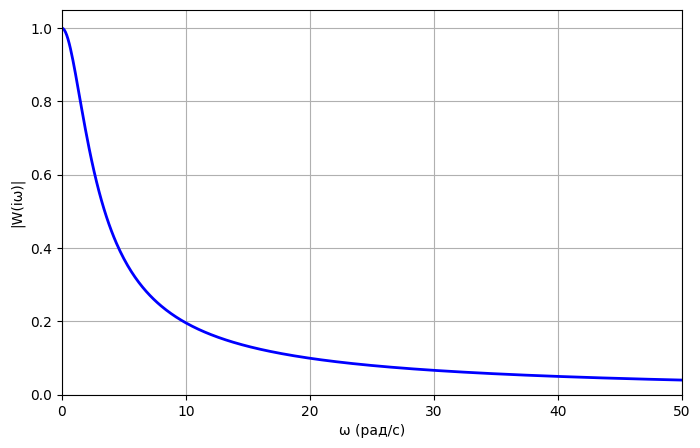

Сравнение методов фильтрации (T = 0.5)


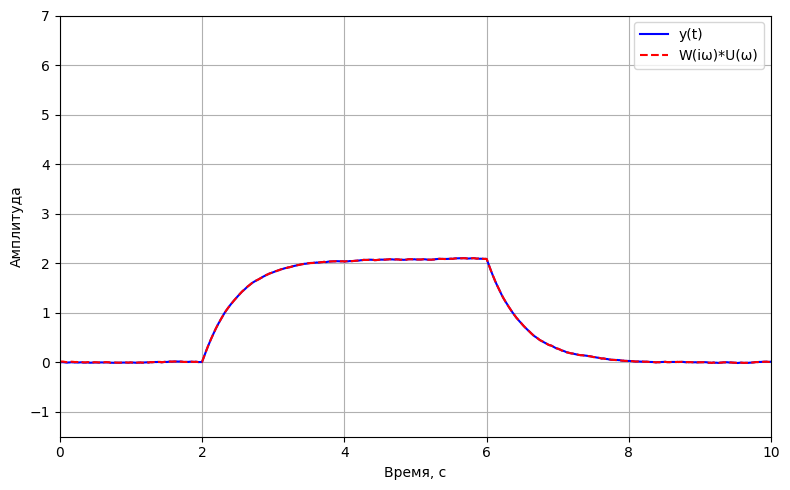

Сравнение Фурье-образов (T = 0.5)


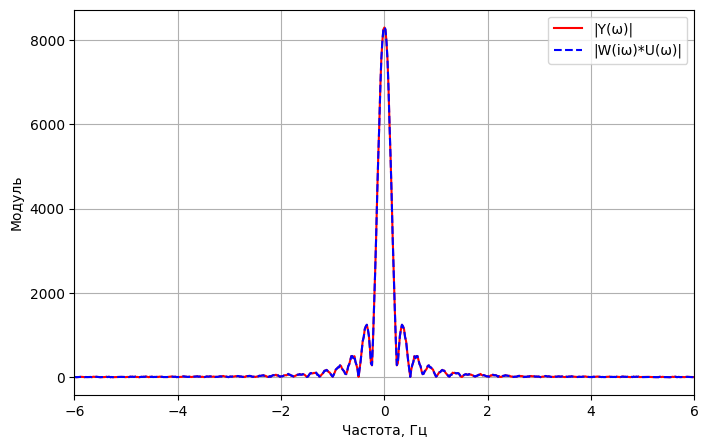

Временные сигналы (T = 0.5)


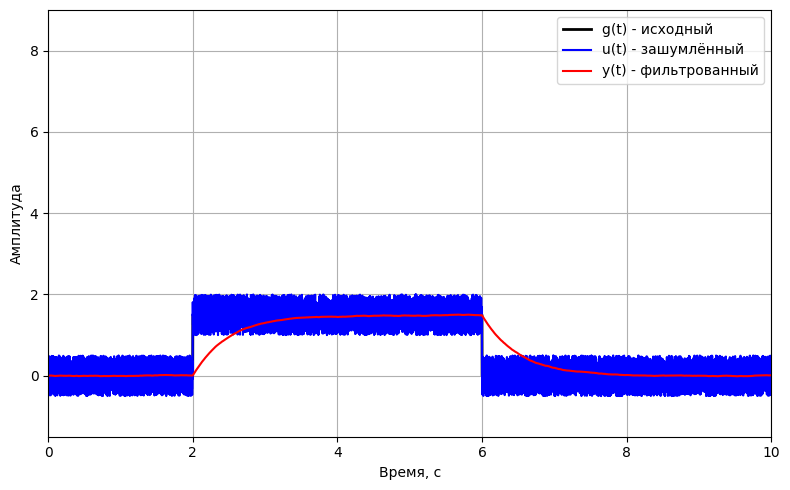

Фурье-образ сигналов


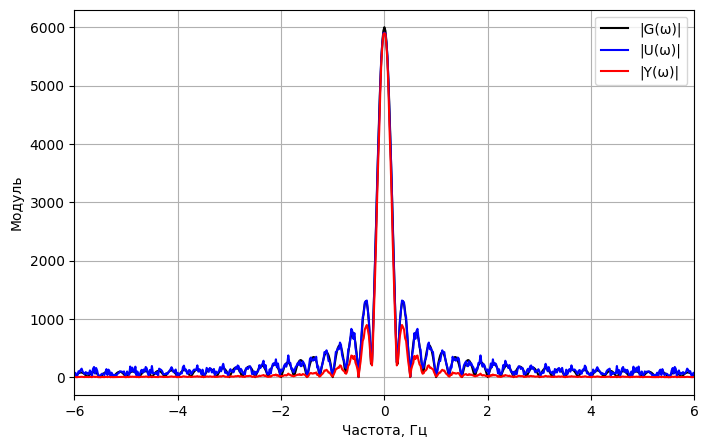

АЧХ фильтра первого порядка (T = 0.5)


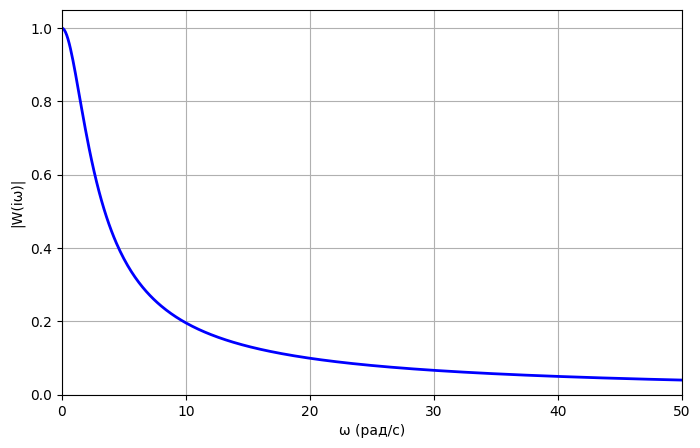

Сравнение методов фильтрации (T = 0.5)


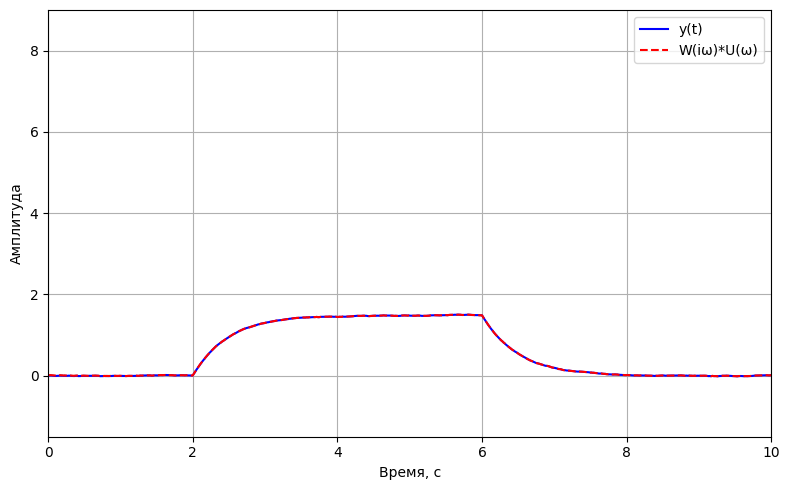

Сравнение Фурье-образов (T = 0.5)


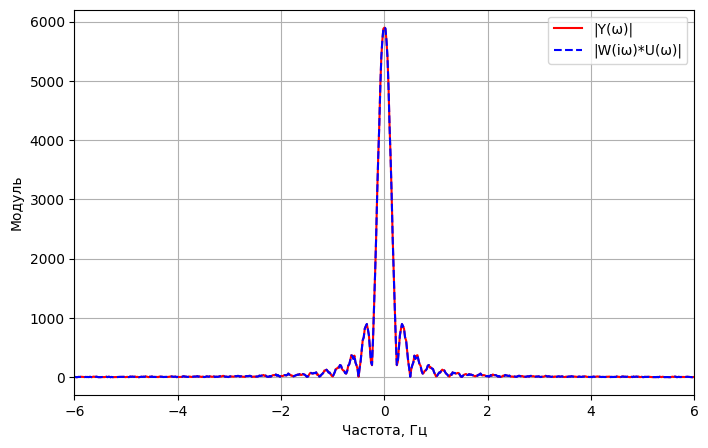

In [ ]:
def generate_signals(a, t1, t2, b, dt, t_end, seed=0):
    t = np.arange(0, t_end, dt)
    g = np.where((t >= t1) & (t <= t2), a, 0)
    np.random.seed(seed)
    noise = b * np.random.uniform(-1, 1, size=t.shape)
    u = g + noise
    return t, g, u

def generate_signals_reject(a, t1, t2, c, d, dt, t_end):
    t = np.arange(0, t_end, dt)
    g = np.where((t >= t1) & (t <= t2), a, 0)
    u = g + c * np.sin(d * t)
    return t, g, u

def zero_pad(signal, pad_factor=2):
    N = len(signal)
    N_pad = int(pad_factor * N)
    pad_total = N_pad - N
    pad_before = pad_total // 2
    pad_after = pad_total - pad_before
    return np.pad(signal, (pad_before, pad_after), mode='constant'), pad_before, pad_after

def compute_fft(signal, dt):
    N = len(signal)
    freq = fftfreq(N, d=dt)
    return fft(signal), freq

def plot_time_signals(t, g, u, y, xlim, ylim, path=None, title=None):
    plt.figure(figsize=(8,5))
    plt.plot(t, g, 'k-', linewidth=2, label='g(t) - исходный')
    plt.plot(t, u, 'b-', label='u(t) - зашумлённый')
    plt.plot(t, y, 'r-', label='y(t) - фильтрованный')
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    if path is not None:
        plt.savefig(path)
    plt.show()

def plot_fourier_signals(freq, G_fft, U_fft, Y_fft, xlim, path=None, title=None):
    plt.figure(figsize=(8,5))
    plt.plot(fftshift(freq), fftshift(np.abs(G_fft)), 'k-', label='|G(ω)|')
    plt.plot(fftshift(freq), fftshift(np.abs(U_fft)), 'b-', label='|U(ω)|')
    plt.plot(fftshift(freq), fftshift(np.abs(Y_fft)), 'r-', label='|Y(ω)|')
    plt.xlabel('Частота, Гц')
    plt.ylabel('Модуль')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)
    if path is not None:
        plt.savefig(path)
    plt.show()

def plot_ach(num, den, w_min=0, w_max=50, ylim=(0, 1.05), path=None, title=None):
    w = np.linspace(w_min, w_max, 500)
    w[0] = 1e-6
    _, h_resp = freqs(num, den, w)
    plt.figure(figsize=(8,5))
    plt.plot(w, np.abs(h_resp), 'b-', linewidth=2)
    plt.xlabel('ω (рад/с)')
    plt.ylabel('|W(iω)|')
    if title:
        plt.title(title)
    plt.grid(True)
    plt.xlim(w_min, w_max)
    plt.ylim(ylim)
    if path is not None:
        plt.savefig(path)
    plt.show()

def plot_time_comparison(t, y, Y_from_fft, xlim, ylim, path=None, title=None):
    plt.figure(figsize=(8,5))
    plt.plot(t, y, 'b-', label='y(t)')
    plt.plot(t, Y_from_fft.real, 'r--', label='W(iω)*U(ω)')
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    if path is not None:
        plt.savefig(path)
    plt.show()

def plot_fourier_comparison(freq, Y_fft, U_fft, H, xlim, path=None, title=None):
    plt.figure(figsize=(8,5))
    plt.plot(fftshift(freq), fftshift(np.abs(Y_fft)), 'r-', label='|Y(ω)|')
    plt.plot(fftshift(freq), fftshift(np.abs(U_fft * H)), 'b--', label='|W(iω)*U(ω)|')
    plt.xlabel('Частота, Гц')
    plt.ylabel('Модуль')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)
    if path is not None:
        plt.savefig(path)
    plt.show()

def task1_1(a, t1, t2, b, dt, t_end, T, xlim=(0, 10), ylim=(-1.5, 3), freq_lim=5):
    t, g, u = generate_signals(a, t1, t2, b, dt, t_end)
    G_fft, freq = compute_fft(g, dt)
    U_fft, _ = compute_fft(u, dt)
    omega = 2 * np.pi * freq

    num = [1]
    den = [T, 1]
    system = TransferFunction(num, den)
    t_out, y, _ = lsim(system, U=u, T=t)
    Y_fft = fft(y)
    H = 1 / (1 + 1j * T * omega)
    Y_from_fft = ifft(U_fft * H)

    print(f"Временные сигналы (T = {T})")
    plot_time_signals(t, g, u, y, xlim=xlim, ylim=ylim, path=f"src/task_1_1/time_{a}_{T}.png")
    print('Фурье-образ сигналов')
    plot_fourier_signals(freq, G_fft, U_fft, Y_fft, xlim=(-freq_lim, freq_lim), path=f"src/task_1_1/spec_{a}_{T}.png")
    print(f"АЧХ фильтра первого порядка (T = {T})")
    plot_ach(num, den, w_min=0, w_max=50, path=f"src/task_1_1/ach_{a}_{T}.png")
    print(f"Сравнение методов фильтрации (T = {T})")
    plot_time_comparison(t, y, Y_from_fft, xlim=xlim, ylim=ylim, path=f"src/task_1_1/time_comp_{a}_{T}.png")
    print(f"Сравнение Фурье-образов (T = {T})")
    plot_fourier_comparison(freq, Y_fft, U_fft, H, (-freq_lim, freq_lim), path=f"src/task_1_1/spec_comp_{a}_{T}.png")


def task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 10), ylim=(-1.5, 3), freq_lim=5, n=0):
    t, g, u = generate_signals_reject(a, t1, t2, c, d, dt, t_end)

    numer = [1, a1, a2]
    denom = [1, b1, b2]
    system = TransferFunction(numer, denom)

    t, y, _ = lsim(system, U=u, T=t)

    y[t < t1] = 0

    G_fft, freq = compute_fft(g, dt)
    U_fft, _ = compute_fft(u, dt)
    omega = 2 * np.pi * freq

    Y_fft = fft(y)
    _, H = freqs(numer, denom, omega)
    Y_from_fft = ifft(U_fft * H)

    filter_label = f"(Режекторный фильтр, a1={a1}, a2={a2}, b1={b1}, b2={b2})"
    print(filter_label)
    print(f"{int(a2)}_{int(b1)}_{c}")

    # plot_time_signals(t, g, u, y, xlim=xlim, ylim=ylim, path=f"src/task_1_2/{n}. time_{int(a2)}_{int(b1)}_{c}.png")
    # plot_fourier_signals(freq, G_fft, U_fft, Y_fft, xlim=(-freq_lim, freq_lim), path=f"src/task_1_2/{n}. spec_{int(a2)}_{int(b1)}_{c}.png")
    # plot_ach(numer, denom, w_min=0, w_max=50, path=f"src/task_1_2/{n}. ach_{int(a2)}_{int(b1)}_{c}.png")
    # plot_time_comparison(t, y, Y_from_fft, xlim=xlim, ylim=ylim, path=f"src/task_1_2/{n}. time_comp_{int(a2)}_{int(b1)}_{c}.png")
    # plot_fourier_comparison(freq, Y_fft, U_fft, H, (-freq_lim, freq_lim), path=f"src/task_1_2/{n}. spec_comp_{int(a2)}_{int(b1)}_{c}.png")

    plot_time_signals(t, g, u, y, xlim=xlim, ylim=ylim)
    plot_fourier_signals(freq, G_fft, U_fft, Y_fft, xlim=(-freq_lim, freq_lim))
    plot_ach(numer, denom, w_min=0, w_max=50)
    plot_time_comparison(t, y, Y_from_fft, xlim=xlim, ylim=ylim)
    plot_fourier_comparison(freq, Y_fft, U_fft, H, (-freq_lim, freq_lim))


if __name__ == '__main__':
    a = 2.0
    t1 = 2.0
    t2 = 6.0
    b = 0.5
    dt = 0.001
    t_end = 50
    # task1_1(a, t1, t2, b, dt, t_end, 0.1, freq_lim=6)
    # task1_1(a, t1, t2, b, dt, t_end, 0.5)
    # task1_1(a, t1, t2, b, dt, t_end, 1.0)
    #
    task1_1(a + 1, t1, t2, b, dt, t_end, 0.5, ylim=(-1.5, 5), freq_lim=6)
    task1_1(a + 0.1, t1, t2, b, dt, t_end, 0.5, ylim=(-1.5, 7), freq_lim=6)
    task1_1(a - 0.5, t1, t2, b, dt, t_end, 0.5, ylim=(-1.5, 9), freq_lim=6)

    w = 2 * 2 * np.pi

    c = 0.5
    d = 2 * w

    a1 = 0.0
    a2 = w**2
    b1 = 3
    b2 = a2

    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), freq_lim=5, n=1)
    #
    # b1 = 1
    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), freq_lim=5, n=2)
    #
    # b1 = 10
    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), freq_lim=5, n=3)

    b1 = 3
    d = w/2
    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), freq_lim=3, n=4)

    b1 = 1
    d = w
    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), freq_lim=3, n=5)

    c = 1.0
    # Изменим амплитуду
    # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(0, 8), ylim=(-1.5, 4), freq_lim=3, n=6)

    # c = 0.5
    # d = 4.0 * 2 * np.pi
    #
    # a2 = (4 * 2 * np.pi)**2
    # b1 = (4 * 2 * np.pi) / q
    # b2 = a2
    # # Изменим частоту
    # # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(8, 17), freq_lim=5, n=3)
    #
    # d = 2.0 * 2 * np.pi
    # q = 1.0
    #
    # a2 = (2 * 2 * np.pi)**2
    # b1 = (2 * 2 * np.pi) / q
    # b2 = a2
    # # Изменим b1
    # # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(8, 17), freq_lim=3, n=4)
    #
    # q = 10.0
    #
    # b1 = (2 * 2 * np.pi) / q
    # # Изменим b1
    # # task_1_2(a, t1, t2, c, d, dt, t_end, a1, a2, b1, b2, xlim=(8, 17), freq_lim=3, n=5)

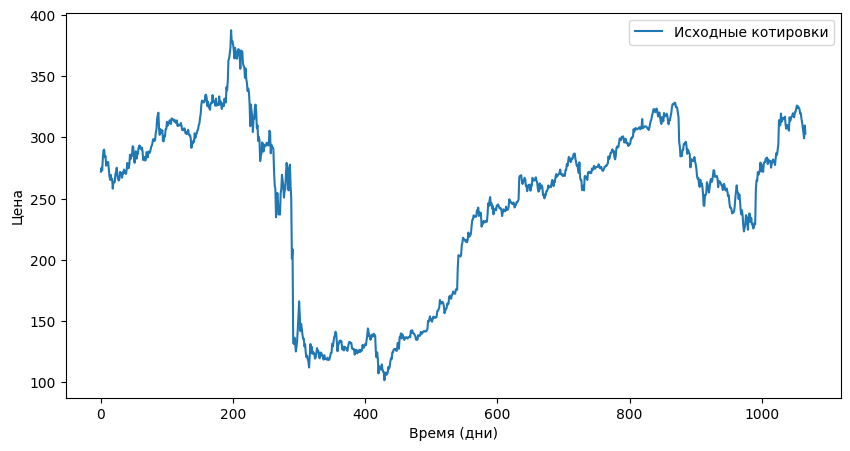

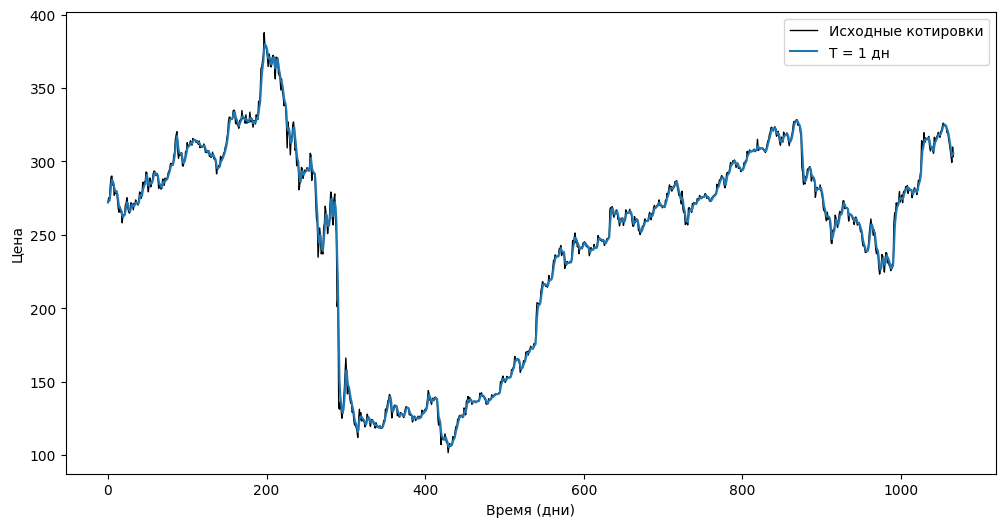

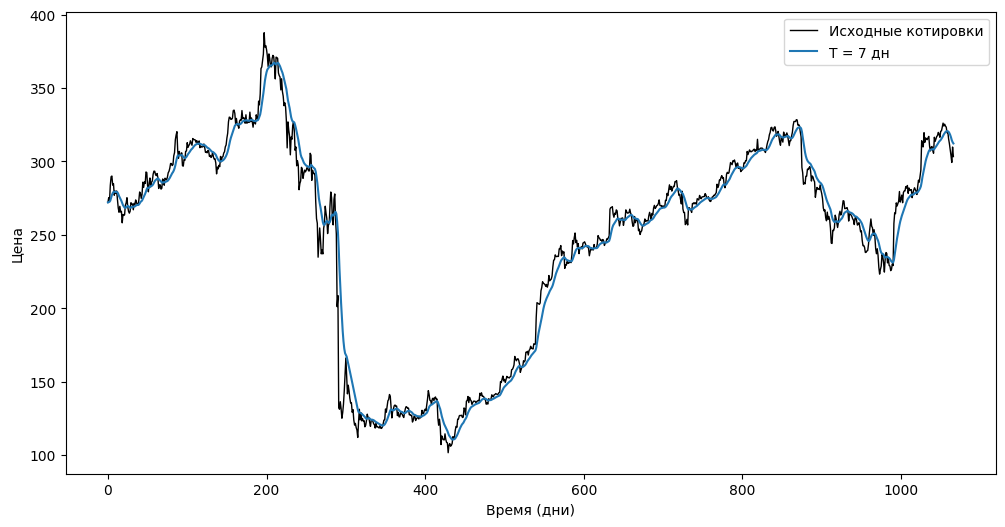

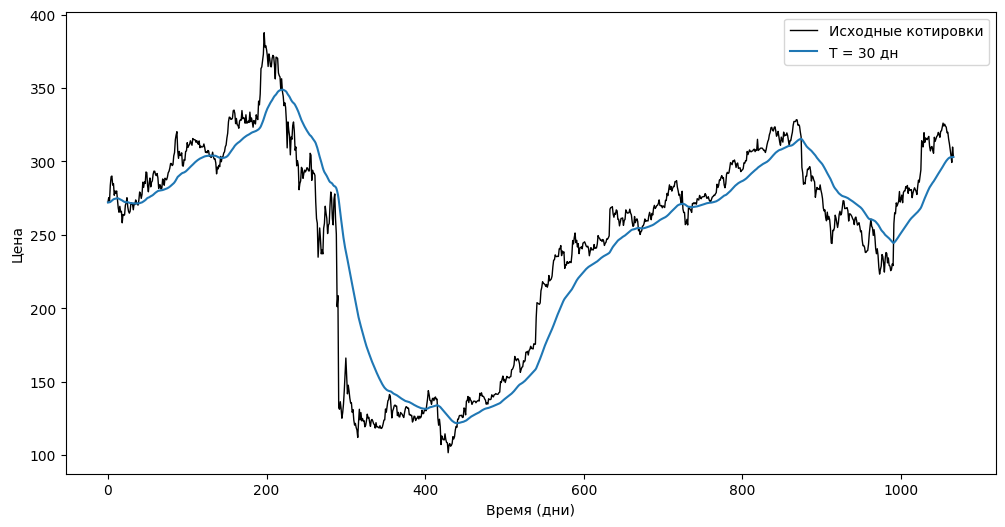

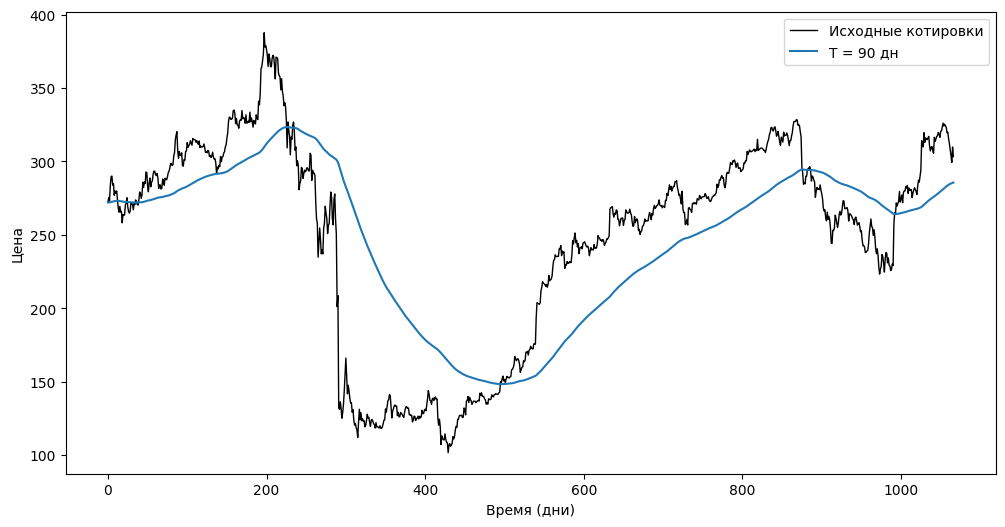

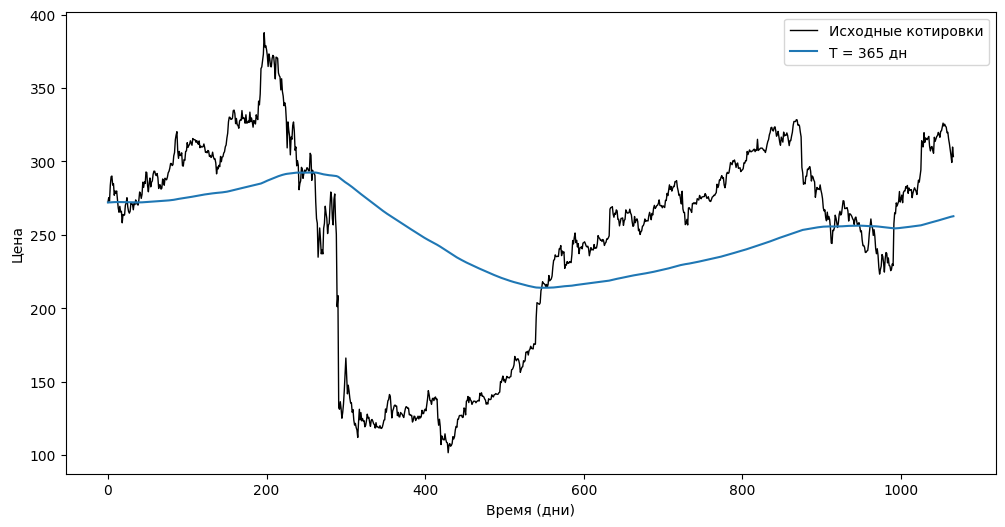

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, tf2ss, StateSpace


df = pd.read_csv('src/SBER_210101_250331.csv', delimiter=';')
df.columns = df.columns.str.replace('[<>]', '', regex=True)

df['Date'] = pd.to_datetime(df['DATE'], format='%d/%m/%y')
df.set_index('Date', inplace=True)

prices = df['CLOSE'].values

t = np.arange(0, len(prices))

plt.figure(figsize=(10,5))
plt.plot(t, prices, label='Исходные котировки')
plt.xlabel('Время (дни)')
plt.ylabel('Цена')
plt.legend()
plt.savefig('src/orig_price.png')
plt.show()

def filter_(prices, t, T):
    num = [1]
    den = [T, 1]
    A, B, C, D = tf2ss(num, den)
    system_ss = StateSpace(A, B, C, D)

    x0 = prices[0] * T
    t_out, y_out, x_state = lsim(system_ss, U=prices, T=t, X0=x0)
    return y_out

T_values = [1, 7, 30, 90, 365]
smoothed_signals = {}

for T in T_values:
    y_smoothed = filter_(prices, t, T)
    smoothed_signals[T] = y_smoothed

    plt.figure(figsize=(12,6))
    plt.plot(t, prices, label='Исходные котировки', color='black', linewidth=1)
    plt.plot(t, smoothed_signals[T], label=f'T = {T} дн')
    plt.xlabel('Время (дни)')
    plt.ylabel('Цена')
    plt.legend()
    plt.savefig(f"src/smooth_price_{T}.png")
    plt.show()
